##K-Means Clustering Model

In [5]:
#Import all the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans

In [31]:
#Load  or create a dataset
df = pd.read_csv('customer_data_records.csv')

# data = {
#     'Customer ID': [1, 2, 3, 4, 5,6, 7, 8, 9, 10],
#     'Annual_Income_(USD$)': [15,16, 17, 18, 19, 80,85, 86,87,88],
#     'Spending_Score_(1-100)': [38, 81, 6, 77, 40,76,94,3,72,14],
# }

# df = pd.DataFrame(data)
# print(df)

df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,117,20
1,2,107,59
2,3,29,36
3,4,121,19
4,5,86,90


In [35]:
#select the features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [36]:
#apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [38]:
#Add cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_
print(df)

     CustomerID  Annual Income (k$)  Spending Score (1-100)  Cluster
0             1                 117                      20        1
1             2                 107                      59        1
2             3                  29                      36        0
3             4                 121                      19        1
4             5                  86                      90        0
..          ...                 ...                     ...      ...
169         170                 111                      76        1
170         171                 138                      87        1
171         172                  84                      15        0
172         173                 107                      92        1
173         174                  17                      98        0

[174 rows x 4 columns]


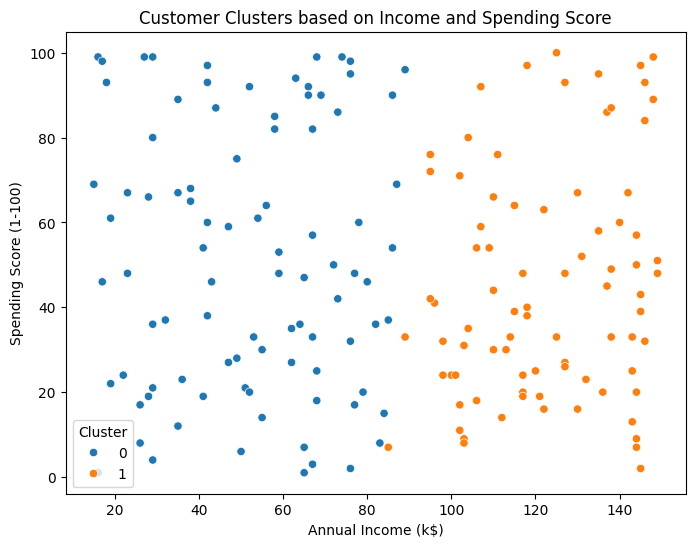

In [42]:
#Visualize our clusters
plt.figure(figsize = (8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster')
plt.title('Customer Clusters based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()
